In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy

In [80]:
covid_19_df = pd.read_csv(r"C:\Users\Ameer\Desktop\AI digital\Projects\Supervised learning project\Covid19_With_GDP_Values (1).csv")

In [81]:
covid_19_df

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
0,0,Afghanistan,2021-01-01,0,52513.0,2201.0,41727.0,1.426650e+10,11.934,NaN
1,1,Afghanistan,2022-01-01,0,158107.0,7356.0,0.0,1.450216e+10,14.100,NaN
2,2,Albania,2021-01-01,0,58316.0,1181.0,33634.0,1.793057e+10,12.473,123.448662
3,3,Albania,2022-01-01,0,210224.0,3217.0,0.0,1.891638e+10,11.588,131.750835
4,4,Algeria,2021-01-01,0,99897.0,2762.0,67395.0,1.862654e+11,13.607,166.218895
...,...,...,...,...,...,...,...,...,...,...
335,335,West Bank and Gaza,2022-01-01,0,469748.0,4919.0,0.0,1.916550e+10,24.420,117.301113
336,336,Zambia,2021-01-01,0,20997.0,390.0,18773.0,2.209642e+10,5.195,299.818966
337,337,Zambia,2022-01-01,0,257948.0,3740.0,0.0,2.916378e+10,5.993,332.778677
338,338,Zimbabwe,2021-01-01,0,14084.0,369.0,11347.0,2.837124e+10,9.540,5411.002445


In [82]:
##checking for duplicates on Country/Region and Date
covid_19_df[covid_19_df.duplicated(subset=["Country/Region","Date"],keep=False)]

,Unnamed: 0,Country/Region,Date,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI


In [83]:
##there doesnt seem to be duplicates in the data

In [84]:
##deleting the Unnamed: 0 column since it only acts as id and doesnt have any value to us
covid_19_df_copy = covid_19_df.drop("Unnamed: 0", axis=1)

In [85]:
##checking for None values
covid_19_df_copy.isna().sum()

Country/Region    0
Date              0
Province/State    0
Confirmed         0
Deaths            0
Recovered         0
GDP               0
Unemployment      0
CPI               2
dtype: int64

In [86]:
##only none values in the cpi of afghanistan, we can remove it from our dataframe
covid_19_df_copy = covid_19_df_copy.drop([0,1])

In [87]:
## we will group the dataframe by country to join 2021 and 2022 data
new_covid_19_df_copy = covid_19_df_copy.groupby("Country/Region").sum()

In [88]:
#We can drop the date column in the dataframe since it will be identical for all instances and doesnt have any value
new_covid_19_df_copy = new_covid_19_df_copy.drop("Date",axis=1)

In [89]:
#checking what rows have value other than "00" in the Province/State column
new_covid_19_df_copy[new_covid_19_df_copy["Province/State"]!="00"]

,Province/State,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
Country/Region,,,,,,,
Australia,Australian Capital TerritoryNew South WalesNor...,491415.0,3166.0,22573.0,3.251990e+12,8.817,256.737773
Canada,AlbertaBritish ColumbiaDiamond PrincessGrand P...,2853329.0,46159.0,494437.0,4.168956e+12,12.807,251.445335
China,AnhuiBeijingChongqingFujianGansuGuangdongGuang...,230781.0,9987.0,90031.0,3.570224e+13,9.530,261.285573
Denmark,Faroe IslandsGreenlandFaroe IslandsGreenland,998541.0,4609.0,131390.0,8.058552e+11,9.477,234.416570
France,French GuianaFrench PolynesiaGuadeloupeMartini...,12993927.0,189730.0,200822.0,5.738448e+12,15.182,230.647205
Netherlands,"ArubaBonaire, Sint Eustatius and SabaCuracaoSi...",4042863.0,33043.0,9651.0,2.039077e+12,7.734,253.101258
New Zealand,Cook IslandsNiueCook IslandsNiue,16419.0,74.0,2082.0,5.003776e+11,7.073,250.220978
United Kingdom,AnguillaBermudaBritish Virgin IslandsCayman Is...,15724201.0,273963.0,5682.0,6.230346e+12,8.556,257.508785


In [90]:
##we will remove the province/state column since its empty in almost all rows
new_covid_19_df_copy = new_covid_19_df_copy.drop("Province/State",axis=1)

In [91]:
##since the cpi column is an average and the Unemployment rate is a percentage we need to divide them by 2
new_covid_19_df_copy["CPI"] = new_covid_19_df_copy["CPI"]/2
new_covid_19_df_copy["Unemployment"] = new_covid_19_df_copy["Unemployment"]/2

In [92]:
new_covid_19_df_copy

,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
Country/Region,,,,,,
Albania,268540.0,4398.0,33634.0,3.684694e+10,12.0305,127.599748
Algeria,318715.0,9046.0,67395.0,4.118257e+11,13.0220,173.919413
Andorra,31857.0,224.0,7463.0,6.705285e+09,12.4370,181.619932
Angola,99966.0,2177.0,11146.0,1.709049e+11,15.2460,645.998608
Antigua and Barbuda,4442.0,124.0,148.0,3.469100e+09,14.6930,123.019852
...,...,...,...,...,...,...
Uzbekistan,276212.0,2099.0,75244.0,1.507414e+11,4.9400,375.337755
Vanuatu,8.0,1.0,1.0,1.972613e+09,4.9525,130.479616
West Bank and Gaza,608971.0,6337.0,118926.0,3.727450e+10,25.4050,115.185995


In [93]:
#We are finished with out data preperation

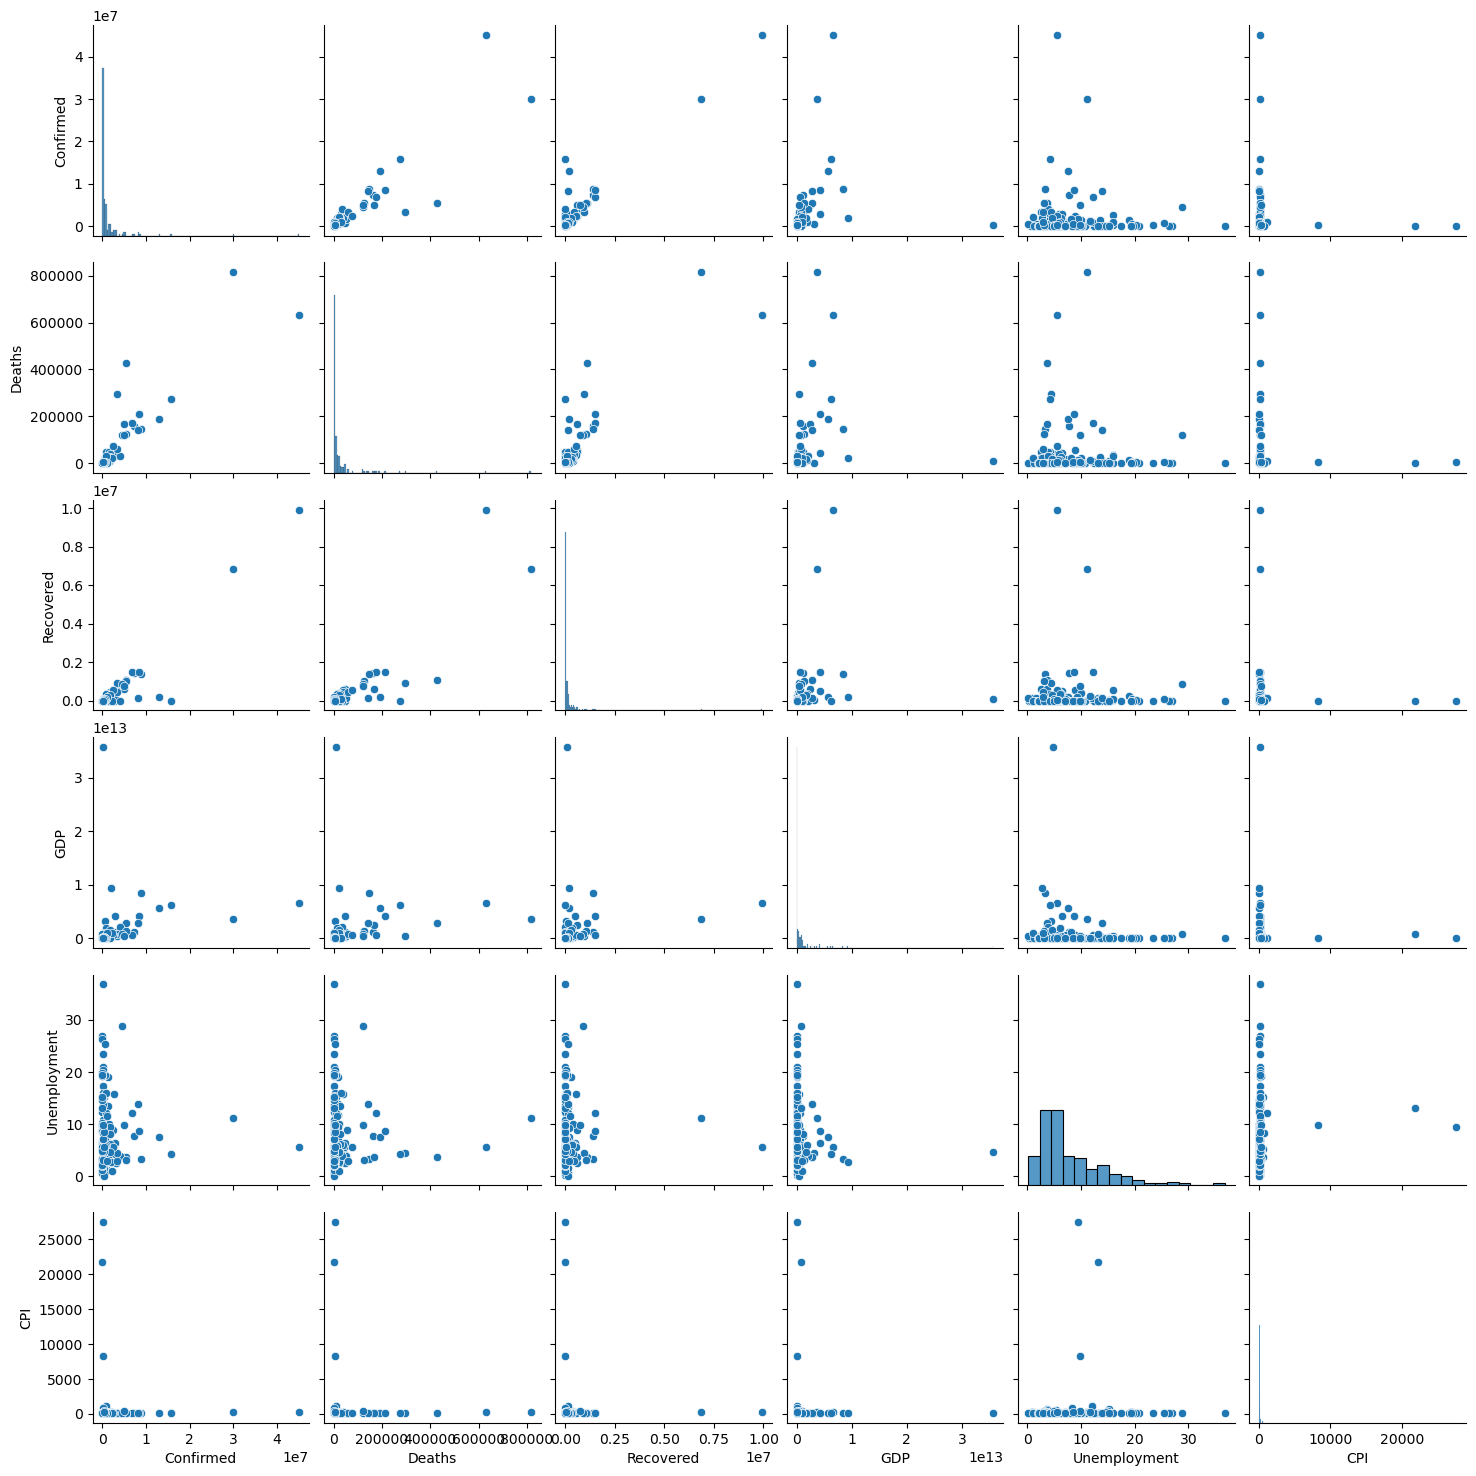

In [94]:
#Checking correlations between columns using pairplot, corr and heatmap
sns.pairplot(data= new_covid_19_df_copy)
plt.show()

In [95]:
new_covid_19_df_copy.corr()

,Confirmed,Deaths,Recovered,GDP,Unemployment,CPI
Confirmed,1.000000,0.898002,0.928932,0.274813,-0.019040,-0.040822
Deaths,0.898002,1.000000,0.858794,0.243658,-0.013037,-0.039189
Recovered,0.928932,0.858794,1.000000,0.204519,-0.001739,-0.030528
GDP,0.274813,0.243658,0.204519,1.000000,-0.094615,-0.021508
Unemployment,-0.019040,-0.013037,-0.001739,-0.094615,1.000000,0.063644
CPI,-0.040822,-0.039189,-0.030528,-0.021508,0.063644,1.000000


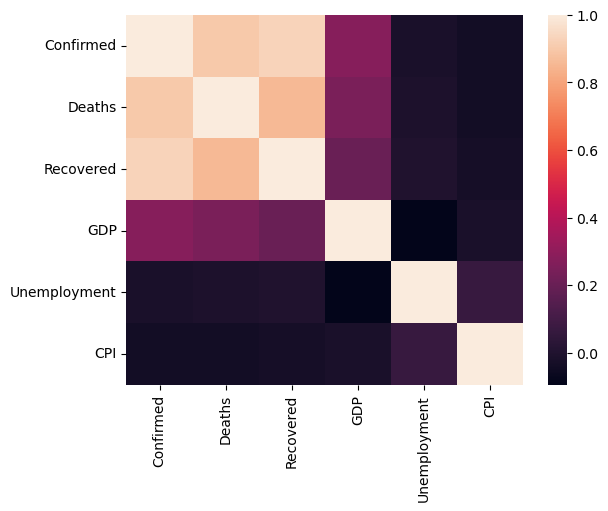

In [96]:
sns.heatmap(data=new_covid_19_df_copy.corr())
plt.show()

In [97]:
#We can see really strong correlations between the features Confirmed Death and Recovered, i believe that is becuse the more confirmed cases there are, the more deaths and recoveries from said confirmed cases.
#the three features also have the strongest correlation to the label "GDP" so i will remove the features Deaths and Recovered.
new_covid_19_df_copy = new_covid_19_df_copy.drop(["Deaths","Recovered"],axis=1)

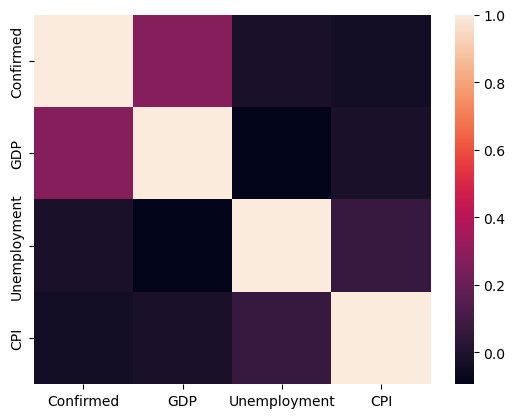

In [98]:
sns.heatmap(data=new_covid_19_df_copy.corr())
plt.show()

In [99]:
#We will now drop the cpi feature since its correlation to the label is extremely weak
new_covid_19_df_copy = new_covid_19_df_copy.drop("CPI",axis=1)

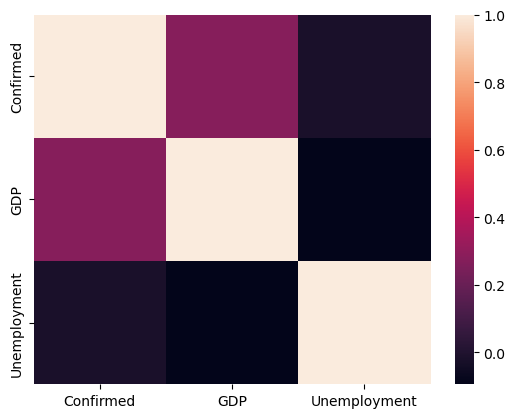

In [100]:
sns.heatmap(data=new_covid_19_df_copy.corr())
plt.show()

In [101]:
##Train_test_split and feature scaling
from sklearn.model_selection import train_test_split

X=new_covid_19_df_copy.drop("GDP",axis=1)
y=new_covid_19_df_copy["GDP"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [103]:
##vanilla linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linear_model = LinearRegression()

scores = cross_val_score(linear_model, scaled_X_train, y_train, scoring="neg_mean_absolute_error", cv=5)
scores

array([-1.76706418e+12, -7.80887897e+11, -6.65663210e+11, -8.49573824e+11,
       -8.47327357e+11])

In [104]:
scores = abs(scores)

In [105]:
print(scores.mean())
print(y_test.mean())
print(scores.mean()/y_test.mean())

982103293523.7448
624022050021.4125
1.5738278695280803


In [106]:
linear_model.fit(scaled_X_train,y_train)

LinearRegression()

In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
y_pred = linear_model.predict(scaled_X_test)

linear_MAE = mean_absolute_error(y_test,y_pred)
linear_MSE = mean_squared_error(y_test,y_pred)
linear_RMSE = root_mean_squared_error(y_test,y_pred)

print(f"MAE:{linear_MAE}, MSE:{linear_MSE}, RMSE:{linear_RMSE}")
print(f"MAE/y_test_mean: {linear_MAE/y_test.mean()}, RMSE/y_test_mean: {linear_RMSE/y_test.mean()}")

MAE:797185390214.3087, MSE:1.9670629005218624e+24, RMSE:1402520196119.0657
MAE/y_test_mean: 1.2774955471316347, RMSE/y_test_mean: 2.2475490987392837


In [108]:
##the model is wildly inaccurate and is practically unusable
##well move on to RidgeCV Regression

In [109]:
from sklearn.linear_model import RidgeCV

alphas = [0.01, 0.1, 1,10]

ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(scaled_X_train,y_train)

y_pred = ridge_cv.predict(scaled_X_test)

print(f"RidgeCV alpha:{ridge_cv.alpha_}")
print(f"RidgeCV betas:{ridge_cv.coef_}")

RidgeCV alpha:10.0
RidgeCV betas:[ 6.49133474e+11 -2.76626641e+11]


In [110]:
ridge_MAE = mean_absolute_error(y_test,y_pred)
ridge_MSE = mean_squared_error(y_test,y_pred)
ridge_RMSE = root_mean_squared_error(y_test,y_pred)
print(f"MAE:{ridge_MAE}, MSE:{ridge_MSE}, RMSE:{ridge_RMSE}")
print(f"{ridge_MAE/y_test.mean()}, {ridge_RMSE/y_test.mean()}")

MAE:794303754269.279, MSE:1.9158486361170443e+24, RMSE:1384141841039.799
1.2728777039882222, 2.21809764733843


In [111]:
##ridge model is just as inaccurate, we'll try lassoCV next

In [115]:
from sklearn.linear_model import LassoCV

lasso_cv_model = LassoCV(eps=0.1,n_alphas=100)
lasso_cv_model.fit(scaled_X_train,y_train)
y_pred = lasso_cv_model.predict(scaled_X_test)

lasso_MAE = mean_absolute_error(y_test,y_pred)
lasso_MSE = mean_squared_error(y_test,y_pred)
lasso_RMSE = root_mean_squared_error(y_test,y_pred)

print(f"MAE:{lasso_MAE}, MSE:{lasso_MSE}, RMSE:{lasso_RMSE}")
print(f"MAE/y_test_mean: {lasso_MAE/y_test.mean()}, RMSE/y_test_mean: {lasso_RMSE/y_test.mean()}")


MAE:791349972082.7164, MSE:1.888901216860859e+24, RMSE:1374373026823.8164
MAE/y_test_mean: 1.268144245953428, RMSE/y_test_mean: 2.202443049531113


In [155]:
##got better results with lassoCV but still very inaccurate, we will try polynominal regression last
from sklearn.preprocessing import PolynomialFeatures

train_rmse_error = []
test_rmse_error =[]

for degree in range(1,5):
    poly_converter = PolynomialFeatures(degree=degree, include_bias=False)
    poly_converter.fit(X)
    poly_features = poly_converter.transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.2,random_state=42)
    scaler.fit(X_train)
    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(scaled_X_train,y_train)
    test_prediction = poly_model.predict(scaled_X_test)
    train_prediction = poly_model.predict(scaled_X_train)

    train_rmse = root_mean_squared_error(y_train,train_prediction)
    test_rmse =  root_mean_squared_error(y_test,test_prediction)

    train_rmse_error.append(train_rmse)
    test_rmse_error.append(test_rmse)

[ 7.53871899e+11  8.14261376e+11  6.40117686e+11  6.03862987e+11
  3.34194382e+11  3.26483063e+12  6.64381299e+11  8.04676097e+11
  6.87437674e+11  3.60915944e+11  4.88648689e+11  3.60287665e+11
  7.67954194e+11  8.21991261e+11  6.71521669e+11  1.62631350e+11
  8.29450333e+11  5.71090683e+11  6.94897295e+11  6.15219368e+10
  3.70834476e+11  8.06265508e+11  9.03265186e+11  8.14611842e+11
  5.06072805e+11  7.64867300e+11  8.54883824e+11  4.33928048e+11
  1.07840787e+12  2.43326798e+10 -2.29044533e+11  5.79078782e+11
  7.90360543e+11  7.24763043e+11]
Country/Region
Singapore                   9.325861e+11
Chad                        2.417679e+10
Palau                       4.721919e+08
Central African Republic    4.899117e+09
South Sudan                 8.105417e+11
United Kingdom              6.230346e+12
Vanuatu                     1.972613e+09
Ethiopia                    2.380346e+11
Morocco                     2.727304e+11
Grenada                     2.347378e+09
Belize               

In [144]:
print(f"Train RMSE arr:{train_rmse_error}")
print(f"Test RMSE arr:{test_rmse_error}")

Train RMSE arr:[3149101468772.4946, 3115315950983.589, 3091051303156.0806, 3072569885259.1646]
Test RMSE arr:[1592996330101.0764, 1416122838620.0293, 1909226244217.9473, 3186493571477.4062]


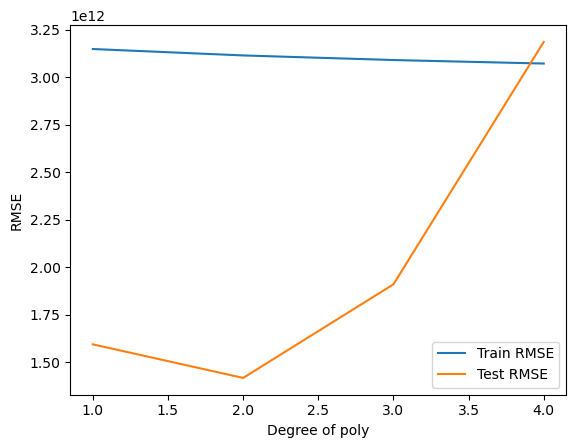

In [145]:
plt.plot(range(1,5), train_rmse_error, label="Train RMSE")
plt.plot(range(1,5), test_rmse_error, label="Test RMSE")

plt.xlabel("Degree of poly")
plt.ylabel("RMSE")
plt.legend()
plt.show()

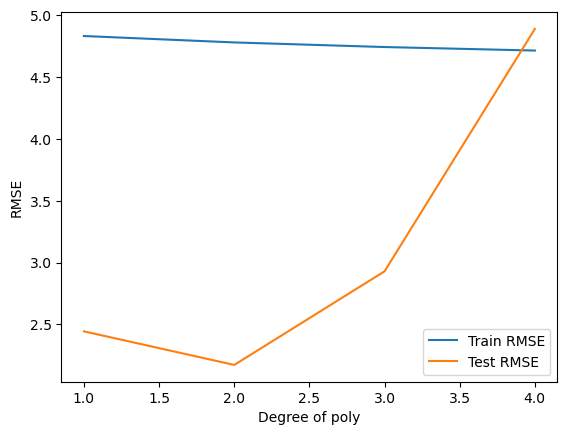

In [146]:
plt.plot(range(1,5), train_rmse_error/y_test.mean(), label="Train RMSE")
plt.plot(range(1,5), test_rmse_error/y_test.mean(), label="Test RMSE")

plt.xlabel("Degree of poly")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [147]:
##the poly features with best resaults are 2nd degree, now we will create out final model

In [158]:
poly_converter = PolynomialFeatures(degree=2, include_bias=False)
poly_converter.fit(X)
poly_features = poly_converter.transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.2,random_state=42)
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(scaled_X_train,y_train)

y_pred = poly_model.predict(scaled_X_test)

In [159]:
poly_MAE = mean_absolute_error(y_test,y_pred)
poly_MSE = mean_squared_error(y_test,y_pred)
poly_RMSE = root_mean_squared_error(y_test,y_pred)

print(f"MAE:{poly_MAE}, MSE:{poly_MSE}, RMSE:{poly_RMSE}")
print(f"MAE/y_test_mean: {poly_MAE/y_test.mean()}, RMSE/y_test_mean: {poly_RMSE/y_test.mean()}")

MAE:594767537058.3452, MSE:2.0054038940612498e+24, RMSE:1416122838620.0293
MAE/y_test_mean: 0.9125178815073195, RMSE/y_test_mean: 2.1726764359785755


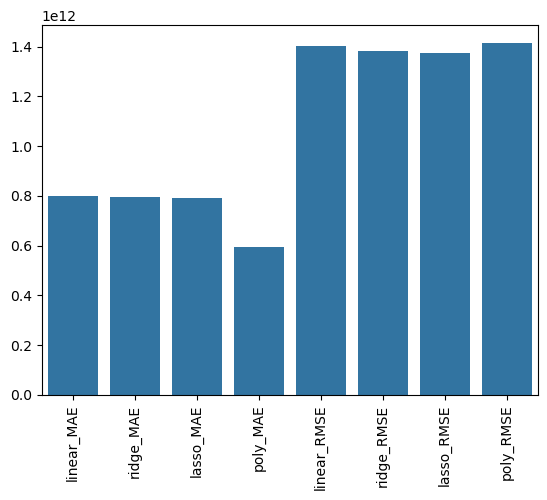

In [165]:
##Best results so far with polynominal regression, We will generate a plot chart to compare models accuracy
sns.barplot(x=["linear_MAE","ridge_MAE","lasso_MAE","poly_MAE","linear_RMSE","ridge_RMSE","lasso_RMSE","poly_RMSE"],y=[linear_MAE,ridge_MAE,lasso_MAE,poly_MAE,linear_RMSE,ridge_RMSE,lasso_RMSE,poly_RMSE])
plt.xticks(rotation=90)
plt.show()

In [166]:
##we can see that the MAE of the polynominal model is the lowest, meaning its the most accurate whilst the RMSE is close to identical in all models,
##therefore, we will choose polynominal regression as our final model

In [172]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)
final_poly_converter.fit(X)
poly_features = final_poly_converter.transform(X)
scaler.fit(poly_features)
scaled_X = scaler.transform(poly_features)
final_poly_model = LinearRegression()
final_poly_model.fit(scaled_X,y)


LinearRegression()

In [171]:
##now that we have chosen and trained our model, we need to export it along with the scaler and the polynominal converter

In [174]:
import joblib
from joblib import dump, load

joblib.dump(final_poly_converter,"final_poly_converter.joblib")
joblib.dump(scaler,"scaler.joblib")
joblib.dump(final_poly_model,"final_poly_model.joblib")

['final_poly_model.joblib']

In [176]:
##now we load the model, scaler and poly converter back in
loaded_poly_converter = joblib.load("final_poly_converter.joblib")
loaded_scaler = joblib.load("scaler.joblib")
loaded_poly_model = joblib.load("final_poly_model.joblib")